In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.options.display.max_columns = 40

In [2]:
df = pd.read_excel('/content/Project_sales.xlsx')


In [3]:
df.head()

,Sales_ID,Quantity,Price,Rate,Holiday,customer_first_name,customer_last_name,customer_email,customer_birthdate,customer_gender,Customer_Type,customer_City,City_Area,City_Population,City_Density(people/km2),employee_first_name,employee_last_name,employee_email,employee_BirthDate,employee_HireDate,RoleDesc,WH,EmpType,Branch_Name,Branch_Location,PaymentMethod,DEPARTMENT,CATEGORY,OrderedDate,PromotionDate,PromotionType
0,0,40,310.8,8.8,0,Victoria,Rackley,vrackley0@printfriendly.com,1956-11-24,Female,Normal,Mafraq,26551,300300,11.3,Juditha,Reckhouse,jreckhouse1s@wired.com,1990-01-04,2021-10-01,Cashier,6h,Fixed term,A,Amman,Cash,Gifts,Gifts by Recipient,2021-11-15,2021-11-01,No Promotion
1,1,6,29.3,6.2,0,Thatcher,Hickford,thickford1@businessweek.com,1959-04-22,Female,Normal,Irbid,1572,1137100,723.4,Isabella,Mehmet,imehmet2c@whitehouse.gov,1994-09-11,2022-04-02,Cashier,6h,Part-time,A,Amman,Ewallet,Designer,SPACE: Emerging & Advanced Designer,2021-12-09,2021-10-14,Free Gift with Purchase
2,2,6,664.7,6.9,1,Rennie,Osgood,rosgood2@ocn.ne.jp,1950-01-09,Female,Member,Ajloun,420,146900,350.1,Muffin,Maryan,mmaryan2d@sphinn.com,1989-12-29,2021-02-01,Cashier,12h,Part-time,C,Zarqa,Ewallet,Kids,Girls' Shoes,2021-06-20,2021-05-02,Free Gift with Purchase
3,3,22,412.9,9.4,1,Sheilah,Labro,slabro3@mysql.com,1953-07-25,Female,Member,Balqa,1120,428000,382.0,Raye,Grent,rgrent1f@vkontakte.ru,1989-10-19,2021-07-23,Cashier,12h,Shiftworkers,C,Zarqa,Cash,Activewear,Kids' Active Shoes,2021-12-09,2021-11-11,Giveaways
4,4,45,170.5,2.5,0,Byrle,Caraher,bcaraher4@angelfire.com,1965-05-24,Male,Member,Mafraq,26551,300300,11.3,Inger,Jovis,ijovis18@networkadvertising.org,1986-03-28,2021-03-31,Cashier,12h,Full-time,D,Balqa,Ewallet,Kids,Boys' Clothing,2021-09-16,2021-08-05,No Promotion


In [4]:
df.dtypes

Sales_ID                             int64
Quantity                             int64
Price                              float64
Rate                               float64
Holiday                              int64
customer_first_name                 object
customer_last_name                  object
customer_email                      object
customer_birthdate          datetime64[ns]
customer_gender                     object
Customer_Type                       object
customer_City                       object
City_Area                            int64
City_Population                      int64
City_Density(people/km2)           float64
employee_first_name                 object
employee_last_name                  object
employee_email                      object
employee_BirthDate          datetime64[ns]
employee_HireDate           datetime64[ns]
RoleDesc                            object
WH                                  object
EmpType                             object
Branch_Name

# Checking for Missing Values

In [5]:
df[df.isna().any(axis=1)]

,Sales_ID,Quantity,Price,Rate,Holiday,customer_first_name,customer_last_name,customer_email,customer_birthdate,customer_gender,Customer_Type,customer_City,City_Area,City_Population,City_Density(people/km2),employee_first_name,employee_last_name,employee_email,employee_BirthDate,employee_HireDate,RoleDesc,WH,EmpType,Branch_Name,Branch_Location,PaymentMethod,DEPARTMENT,CATEGORY,OrderedDate,PromotionDate,PromotionType


# Checking for Duplicates

In [6]:
df.duplicated().sum()

0

# Outliers Detection

Using boxplots for general detection of outliers. 

In [7]:
def add_trace(fig, df, var, row, col):

  return fig.add_trace(go.Box(y=df[var], name=var),row=row, col=col)

vars = ['Quantity','Price','Rate','City_Area','City_Population', 'City_Density(people/km2)']
                    
fig = make_subplots(rows=2, cols=3, 
                     subplot_titles=(vars))

add_trace(fig, df, vars[0], 1, 1)
add_trace(fig, df, vars[1], 1, 2)
add_trace(fig, df, vars[2], 1, 3)
add_trace(fig, df, vars[3], 2, 1)
add_trace(fig, df, vars[4], 2, 2)
add_trace(fig, df, vars[5], 2, 3)

fig.update_layout(height=600, width=800, title = "Spread of Numerical Data in the Sales Dataset", margin=dict(l=20, r=20, t=45, b=20))

There are potential outliers in the columns City_Popualtion, City_Area, and Quantity. We will explore them further with Rosner's Test later.

# Feature Creation

## Customer Age

In [8]:
df["customer_age"] = pd.to_datetime(df["customer_birthdate"]).dt.normalize()
date = datetime.datetime(2022, 7,13)
df["customer_age"] = date - df["customer_age"]
df["customer_age"] = df["customer_age"] / np.timedelta64(1,'Y')
df["customer_age"] =df["customer_age"].round(0)

Binning based on age groups:

11-20 years --> Teen

	
20-39 years --> Adult

	
39-59 years --> Middle Age Adult

	
59+ years --> Senior Adult 

In [9]:
df["customer_age_bins"]= pd.cut(df["customer_age"], bins=[11,20,39,59,75], labels = ["11-20", "20-39","39-59","59+"],right=False)


## Employee Age

In [10]:

df["employee_age"] = pd.to_datetime(df["employee_BirthDate"]).dt.normalize()
date = datetime.datetime(2022, 7,13)
df["employee_age"] = date - df["employee_age"]
df["employee_age"] = df["employee_age"] / np.timedelta64(1,'Y')
df["employee_age"] =df["employee_age"].round(0)

## Employee Tenure

Employee Tenure is a reference to the length of service an employee has given to an employer. 
We calculated it by subtracting the Employee_Hiredate from the current date


In [11]:
df["employee_tenure"] = pd.to_datetime(df["employee_HireDate"]).dt.normalize()
date = datetime.datetime(2022, 7,13)
df["employee_tenure"] = date - df["employee_tenure"]
df["employee_tenure"] = df["employee_tenure"] / np.timedelta64(1,'M')
df["employee_tenure"] =df["employee_tenure"].round(0)

Binning employee_tenure

In [12]:
df['employee_tenure_bins']=pd.qcut(df['employee_tenure'] , q=6 , labels=['0-4' ,'5-9','10-14','15-19','20-24','25+'])


## Quarter in which order has been placed

In [13]:
df['Sales_Year'] = df['OrderedDate'].apply(lambda x: x.strftime('%Y'))
df["Sales_Year"]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
3995    2022
3996    2021
3997    2021
3998    2021
3999    2021
Name: Sales_Year, Length: 4000, dtype: object

In [14]:
df["Sales_Q"] = df['OrderedDate'].apply(lambda x: x.strftime('%m'))
dict1 = {"Q1" : [1,2,3],
'Q2': [4,5,6],
'Q3':[7,8,9],
'Q4': [10,11,12]}
df["Sales_Q"] = df["Sales_Q"].astype('int64')
df["Sales_Q"] = pd.cut(df["Sales_Q"], bins = 4, labels = ["Q1", "Q2", "Q3","Q4"])
df["Sales_Q"]

0       Q4
1       Q4
2       Q2
3       Q4
4       Q3
        ..
3995    Q1
3996    Q3
3997    Q1
3998    Q2
3999    Q3
Name: Sales_Q, Length: 4000, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

## Regions 

In [15]:
df["Region"] = df["customer_City"]
df["Region"].replace(to_replace =["Balqa", "Amman", "Zarqa","Madaba"], value ="Central province", inplace=True)
df["Region"].replace(to_replace =["Irbid", "Jerash","Ajloun","Mafraq"], value ="North Province", inplace= True)
df["Region"].replace(to_replace =["Karak", "Ma'an","Tafilah","Aqaba"], value ="South Province", inplace=True)

## Promotion

In [16]:
df["Promotion"] = (df["PromotionType"] != "No Promotion")

In [17]:
df['Promotion'].unique()

array([False,  True])

## Online

In [18]:
df["Online"] = (df["Branch_Location"] == "Online")

In [19]:
df['Online'].unique()

array([False,  True])

## Dropping unnecessary Columns

In [20]:
drop_cols = ['customer_first_name', 'customer_last_name', 'customer_email','customer_birthdate', 'City_Area', 
             'City_Population','employee_first_name', 'employee_last_name','employee_email', 'employee_BirthDate', 
             'employee_HireDate','RoleDesc','CATEGORY']
             
df.drop(drop_cols, inplace=True, axis=1)

In [56]:
df

,Sales_ID,Quantity,Price,Rate,Holiday,customer_gender,Customer_Type,customer_City,City_Density(people/km2),WH,EmpType,Branch_Name,Branch_Location,PaymentMethod,DEPARTMENT,OrderedDate,PromotionDate,PromotionType,customer_age,customer_age_bins,employee_age,employee_tenure,employee_tenure_bins,Sales_Year,Sales_Q,Region,Promotion,Online
0,0,40,310.8,8.8,0,Female,Normal,Mafraq,11.3,6h,Fixed term,A,Amman,Cash,Gifts,2021-11-15,2021-11-01,No Promotion,66.0,59+,33.0,9.0,5-9,2021,Q4,North Province,False,False
1,1,6,29.3,6.2,0,Female,Normal,Irbid,723.4,6h,Part-time,A,Amman,Ewallet,Designer,2021-12-09,2021-10-14,Free Gift with Purchase,63.0,59+,28.0,3.0,0-4,2021,Q4,North Province,True,False
2,2,6,664.7,6.9,1,Female,Member,Ajloun,350.1,12h,Part-time,C,Zarqa,Ewallet,Kids,2021-06-20,2021-05-02,Free Gift with Purchase,73.0,59+,33.0,17.0,20-24,2021,Q2,North Province,True,False
3,3,22,412.9,9.4,1,Female,Member,Balqa,382.0,12h,Shiftworkers,C,Zarqa,Cash,Activewear,2021-12-09,2021-11-11,Giveaways,69.0,59+,33.0,12.0,10-14,2021,Q4,Central province,True,False
4,4,45,170.5,2.5,0,Male,Member,Mafraq,11.3,12h,Full-time,D,Balqa,Ewallet,Kids,2021-09-16,2021-08-05,No Promotion,57.0,39-59,36.0,15.0,15-19,2021,Q3,North Province,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,138,930.0,2.9,0,Male,Member,Karak,71.3,12h,Shiftworkers,F,Online,Cash,Activewear,2022-01-05,2021-11-10,Tiered Promotions,49.0,39-59,21.0,17.0,20-24,2022,Q1,South Province,True,True
3996,3996,87,971.0,9.9,1,Female,Member,Ma'an,3.7,8h,Part-time,F,Online,Credit card,Men,2021-08-03,2021-06-08,Online Promotion,30.0,20-39,21.0,18.0,20-24,2021,Q3,South Province,True,True
3997,3997,60,532.1,7.5,1,Female,Member,Mafraq,11.3,8h,Fixed term,F,Online,Ewallet,Men,2021-02-17,2021-01-27,Sales Promotion,35.0,20-39,36.0,11.0,10-14,2021,Q1,North Province,True,True
3998,3998,88,390.6,9.9,1,Male,Member,Mafraq,11.3,12h,Part-time,F,Online,Cash,Activewear,2021-05-04,2021-04-20,Tiered Promotions,37.0,20-39,22.0,5.0,0-4,2021,Q2,North Province,True,True


# Correlations

## Heatmap

**Size of Correlation**|**Interpretation**
:-----:|:-----:
.90 to 1.00 (−.90 to −1.00)|Very high positive (negative) correlation
.70 to .90 (−.70 to −.90)|High positive (negative) correlation
.50 to .70 (−.50 to −.70)|Moderate positive (negative) correlation
.30 to .50 (−.30 to −.50)|Low positive (negative) correlation
.00 to .30 (.00 to −.30)|negligible correlation

## Pearson Correlation

Pearson's Correlation using only the lower half of the heatmap to avoid redundancy.


In [57]:
df2 = df.drop('Sales_ID',axis=1)

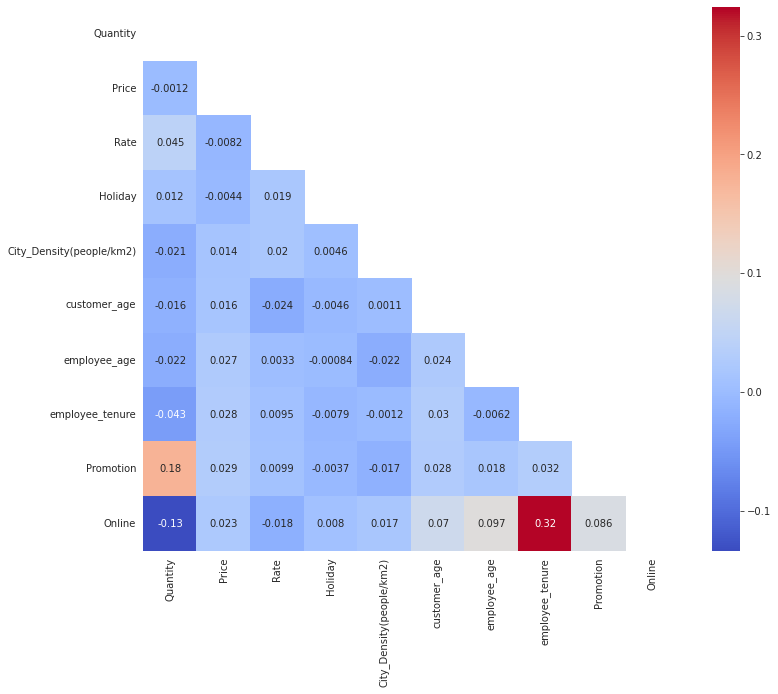

In [59]:
plt.figure(figsize = (12,10))
corr = df2.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, cmap = 'coolwarm', mask = matrix)

We can see that most of the correlations between numerical variables are negligbile, or low correlations. 

# Distributions of Variables

In [22]:
df.describe()

,Sales_ID,Quantity,Price,Rate,Holiday,City_Density(people/km2),customer_age,employee_age,employee_tenure
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,1999.500000,63.538750,495.345250,5.463725,0.496000,231.492025,45.62825,30.380750,13.131500
std,1154.844867,44.012558,287.884564,2.604830,0.500047,215.922483,13.90201,6.800172,7.357496
min,0.000000,1.000000,1.800000,1.000000,0.000000,3.700000,11.00000,19.000000,2.000000
25%,999.750000,28.000000,244.775000,3.200000,0.000000,40.500000,35.00000,24.000000,8.000000
50%,1999.500000,56.000000,491.450000,5.500000,0.000000,199.900000,45.00000,31.000000,12.000000
75%,2999.250000,88.000000,742.575000,7.700000,1.000000,350.100000,56.00000,36.000000,17.000000
max,3999.000000,180.000000,999.900000,10.000000,1.000000,723.400000,73.00000,42.000000,30.000000


 Distribution of Employees/Customer ages

Skewness:  0.0407988516867981
Kurtosis:  -0.7482232672085551 




Text(0.5, 1.0, 'Distribution of Customer Ages')

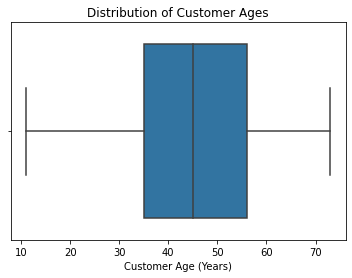

In [23]:
print("Skewness: ", df["customer_age"].skew())
print("Kurtosis: ", df["customer_age"].kurtosis(),'\n\n')
sns.boxplot(data =df, x = "customer_age")
plt.xlabel("Customer Age (Years)")
plt.title("Distribution of Customer Ages")

Skewness:  -0.11729376748820634
Kurtosis:  -1.2475981668773617 



count    4000.000000
mean       30.380750
std         6.800172
min        19.000000
25%        24.000000
50%        31.000000
75%        36.000000
max        42.000000
Name: employee_age, dtype: float64

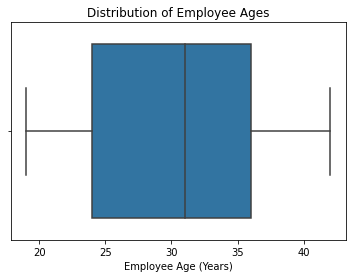

In [24]:
print("Skewness: ", df["employee_age"].skew())
print("Kurtosis: ", df["employee_age"].kurtosis(),'\n')
sns.boxplot(data = df, x = "employee_age")
plt.xlabel("Employee Age (Years)")
plt.title("Distribution of Employee Ages")
stats = df.describe()
stats["employee_age"]

Skewness:  0.552837288052286
Kurtosis:  -0.36675555728192855 




Text(0.5, 1.0, 'Distribution of Employee Tenure')

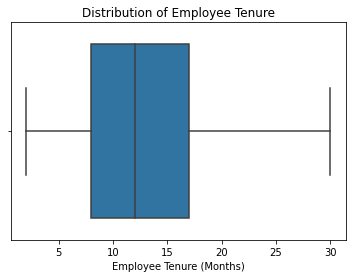

In [25]:
print("Skewness: ", df["employee_tenure"].skew())
print("Kurtosis: ", df["employee_tenure"].kurtosis(),'\n\n')
sns.boxplot(data = df, x = "employee_tenure")
plt.xlabel("Employee Tenure (Months)")
plt.title("Distribution of Employee Tenure")



Skewness:  0.015207131832901424
Kurtosis:  -1.191966826178514 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



count    4000.000000
mean      495.345250
std       287.884564
min         1.800000
25%       244.775000
50%       491.450000
75%       742.575000
max       999.900000
Name: Price, dtype: float64

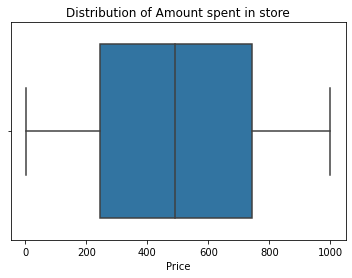

In [26]:
print("Skewness: ", df["Price"].skew())
print("Kurtosis: ", df["Price"].kurtosis(),'\n\n')
sns.boxplot(df["Price"])
plt.title("Distribution of Amount spent in store")
stats["Price"]

Skewness:  0.6963504953101468
Kurtosis:  -0.33356247908662073 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



count    4000.000000
mean       63.538750
std        44.012558
min         1.000000
25%        28.000000
50%        56.000000
75%        88.000000
max       180.000000
Name: Quantity, dtype: float64

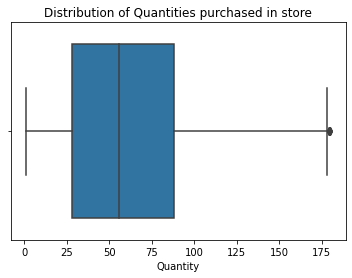

In [27]:
print("Skewness: ", df["Quantity"].skew())
print("Kurtosis: ", df["Quantity"].kurtosis(),'\n')

sns.boxplot(df["Quantity"])
plt.title("Distribution of Quantities purchased in store")
stats["Quantity"]


In [28]:
df[df["Online"] == True]["Quantity"].describe()

count    2000.000000
mean       57.664500
std        39.755379
min         1.000000
25%        26.000000
50%        51.000000
75%        78.000000
max       150.000000
Name: Quantity, dtype: float64

In [29]:
df[df["Online"] == False]["Quantity"].describe()

count    2000.000000
mean       69.413000
std        47.176702
min         1.000000
25%        32.000000
50%        61.000000
75%        94.250000
max       180.000000
Name: Quantity, dtype: float64

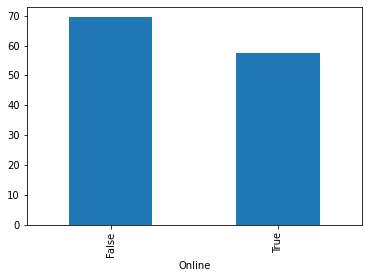

In [30]:
df.groupby("Online")["Quantity"].mean().plot(kind ='bar')

# Sales Percentages of each employee Type

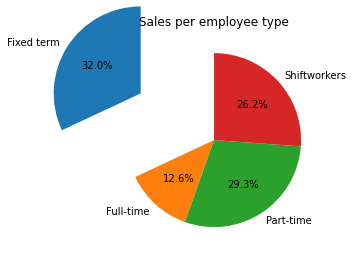

In [31]:
x = (df.groupby("EmpType")["Price"].sum() /df["Price"].sum())*100
fig, ax = plt.subplots()
ax.pie(x, autopct='%1.1f%%', startangle=90, labels = x.index, explode =(x == max(x)))
fig.patch.set_facecolor('white')
ax.set_title("Sales per employee type")
plt.show()

In [32]:
df.groupby("Branch_Location")["Price"].sum()

Branch_Location
Amman      180851.9
Aqaba      187848.5
Balqa      187464.9
Irbid      215509.7
Online    1003753.3
Zarqa      205952.7
Name: Price, dtype: float64

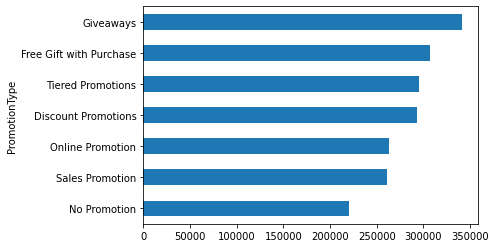

In [33]:
x= df.groupby("PromotionType")["Price"].sum().sort_values().plot(kind= 'barh')
#obviously the income from giveaways sales are the most and the standard price with no promotion is the least with 220k

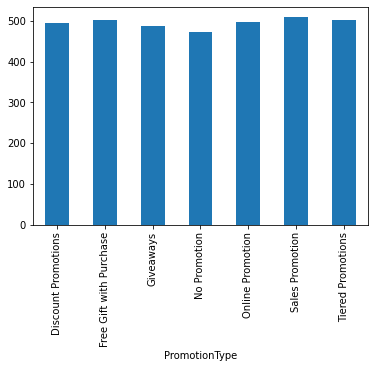

In [34]:
df1 = df.groupby("PromotionType")["Price"].mean()
df1.plot(kind = 'bar')

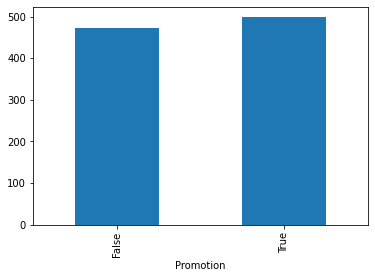

In [35]:
df2 = df.groupby("Promotion")["Price"].mean()
df2.plot(kind = 'bar')

In [36]:
df[df["PromotionType"] == "Giveaways"]["Price"].sum()/len(df[df["PromotionType"] == "Giveaways"])

488.665522174535

In [37]:
df[df["PromotionType"] == "No Promotion"]["Price"].sum()/len(df[df["PromotionType"] == "No Promotion"])

472.1779443254818

In [38]:
df[df["Promotion"] == 1]["Price"].sum()/len(df[df["Promotion"] == 1])

498.40755731672795

In [39]:
df[df["Promotion"] == 0]["Price"].sum()/len(df[df["Promotion"] == 0])

472.1779443254818

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



292.5389759722141


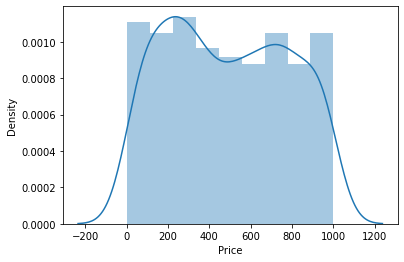

In [40]:
sns.distplot(df[df["PromotionType"] == "Giveaways"]["Price"])
print(df[df["PromotionType"] == "Giveaways"]["Price"].std())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



289.7461229371992


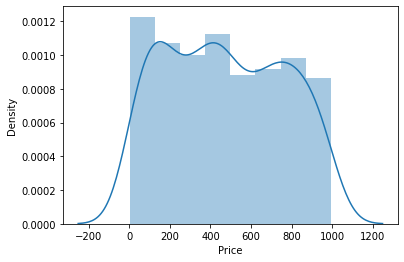

In [41]:
sns.distplot(df[df["PromotionType"] == "No Promotion"]["Price"])
print(df[df["PromotionType"] == "No Promotion"]["Price"].std())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



284.47669563388826


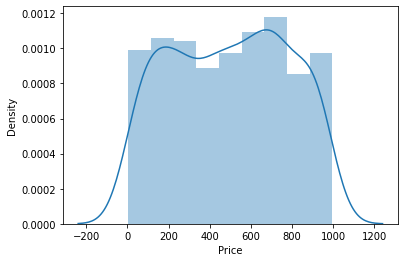

In [42]:
sns.distplot(df[df["PromotionType"] == "Online Promotion"]["Price"])
print(df[df["PromotionType"] == "Online Promotion"]["Price"].std())

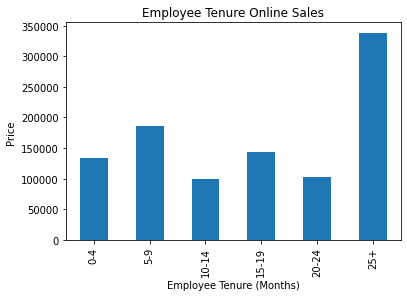

In [43]:
df[df["Branch_Location"] == "Online"].groupby("employee_tenure_bins")["Price"].sum().plot(kind = 'bar', title = "Employee Tenure Online Sales", xlabel = "Employee Tenure (Months)", ylabel = "Price ")

# Sales percentages for each promotion type

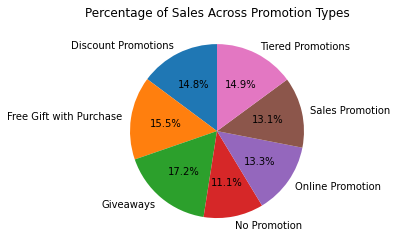

In [44]:
g = ((df.groupby("PromotionType")["Price"].sum() / df['Price'].sum())*100)
fig1, ax1 = plt.subplots()
ax1.pie(g, autopct='%1.1f%%', startangle=90, labels= g.index)
fig1.patch.set_facecolor('white')
ax1.set_title("Percentage of Sales Across Promotion Types")
plt.show()

In [45]:
# sns.catplot(data = df, kind='bar', x='DEPARTMENT', y="Price", hue ="Promotion", size = 10)
# #sales with and with out promotion for every department

In [46]:
df[df["Sales_Year"] == "2021"].shape

(3665, 28)

In [47]:
df[df["Sales_Year"] == "2022"].shape

(335, 28)

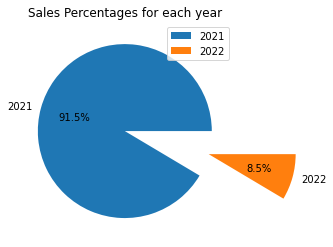

In [48]:
f = (df.groupby("Sales_Year")["Price"].sum()/df["Price"].sum() *100)
fig3, ax2 = plt.subplots()
ax2.pie(f, autopct='%1.1f%%', labels = f.index, explode=(f == min(f)))
fig3.patch.set_facecolor('white')
ax2.set_title("Sales Percentages for each year")
ax2.legend()
plt.show()

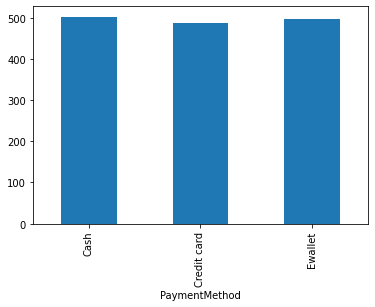

In [49]:
df.groupby("PaymentMethod")["Price"].mean().plot(kind = "bar")
sns.set_style("whitegrid")

Text(0.5, 0.98, 'Number of transactions made in each department by Payment Method')

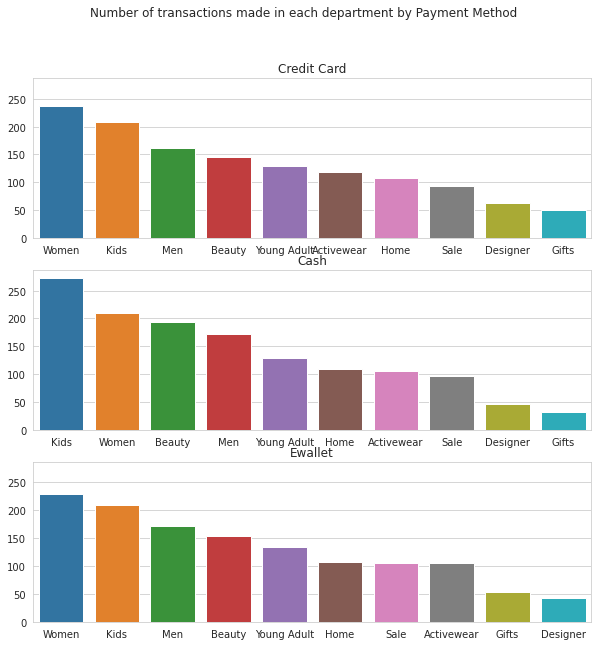

In [50]:
fig5, ax3 = plt.subplots(3,1, sharex = False,sharey=True, figsize=(10,10))
a =df[df["PaymentMethod"] == "Credit card"]
b = df[df["PaymentMethod"] == "Cash"]
c = df[df["PaymentMethod"] == "Ewallet"]

sns.barplot(ax = ax3[0], x = (a["DEPARTMENT"].value_counts()).index,y = (a["DEPARTMENT"].value_counts()).values)
ax3[0].set_title("Credit Card")

sns.barplot(ax = ax3[1], x = (b["DEPARTMENT"].value_counts()).index,y = (b["DEPARTMENT"].value_counts()).values)
ax3[1].set_title("Cash")

sns.barplot(ax = ax3[2], x = (c["DEPARTMENT"].value_counts()).index,y = (c["DEPARTMENT"].value_counts()).values)
ax3[2].set_title("Ewallet")
sns.set_style("whitegrid")

fig5.suptitle("Number of transactions made in each department by Payment Method")

Text(0.5, 0.98, 'Gender Distribution across membership type')

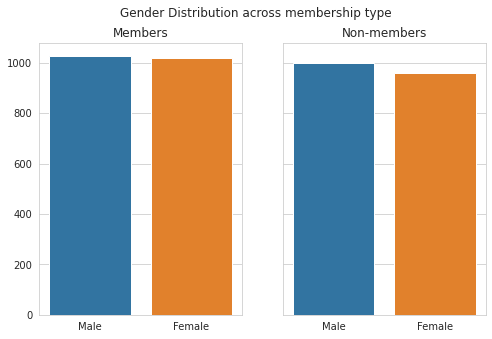

In [51]:
aa = df.groupby("customer_gender")["customer_gender"]
fig6, ax4 = plt.subplots(1,2, sharex = False,sharey=True, figsize=(8,5))
e =df[df["Customer_Type"] == "Member"]
f = df[df["Customer_Type"] == "Normal"]

sns.barplot(ax = ax4[0], x = (e["customer_gender"].value_counts()).index,y = (e["customer_gender"].value_counts()).values)
ax4[0].set_title("Members")

sns.barplot(ax = ax4[1], x = (f["customer_gender"].value_counts()).index,y = (f["customer_gender"].value_counts()).values)
ax4[1].set_title("Non-members")

sns.set_style("whitegrid")

fig6.suptitle("Gender Distribution across membership type")


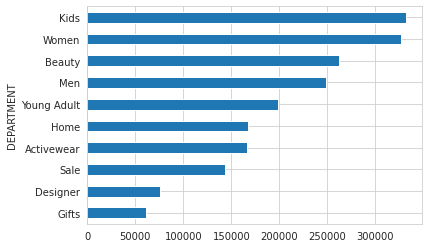

In [52]:
df.groupby('DEPARTMENT')['Price'].sum().sort_values().plot(kind='barh')

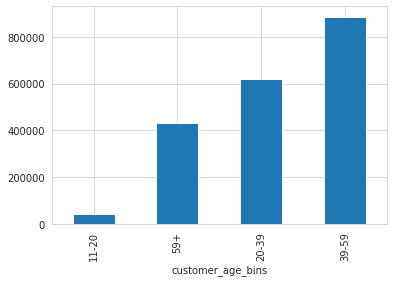

In [53]:
df.groupby('customer_age_bins')['Price'].sum().sort_values().plot(kind='bar')

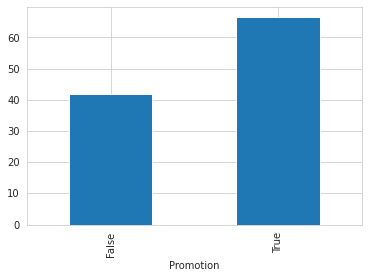

In [54]:
df.groupby('Promotion')['Quantity'].mean().plot(kind='bar')

# Sales Percentages based on Customer Age

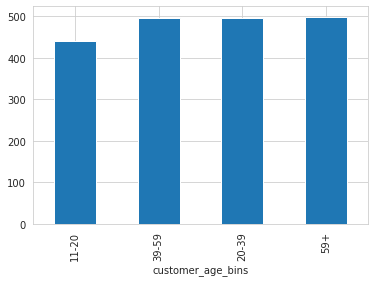

In [61]:
df.groupby('customer_age_bins')['Price'].mean().sort_values().plot(kind='bar')

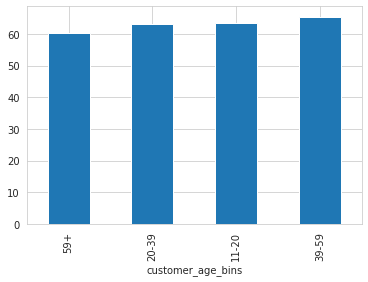

In [62]:
df.groupby('customer_age_bins')['Quantity'].mean().sort_values().plot(kind='bar')

# R Code

## P_Value

When identifying a relationship between two variables, there is always a possibility that this correlation might be a coincidence (data randomly generated), a p-value calculation helps determine if the observed relationship could arise as a result of chance.



P_value < 0.05 means it's significant, not a coicidence.


P_value > 0.05 means it's not significant (randomly generated)

In [ ]:
"""
install.packages(c("Hmisc", "tidyverse"))
library("tidyverse")
library("Hmisc")

df = read.csv('Sales Data-Table 1.csv')

#taking the numeric columns only

num_df <- df[, c(3,4,5,14,15,16,33)]
num_df

results <- cor(num_df)
results
round(results,2)

results2 <- rcorr(as.matrix(num_df))
results2
"""

Results of P_Value:


>         **-**|**Quantity**|**Price**|**Rate**|**City_Area**|**City_Population**|**City_Density**|**Customer_Age**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
Quantity |-| 0.9402|0.0047| 0.6140|    0.9724|         0.1768|  0.3139| 
Price |0.9402   |-|       0.6050| 0.1394|    0.8456|          0.3819|                   0.3206|
Rate |0.0047|   0.6050|     -   |0.4286|    0.2986|          0.2082|                   0.1261|
City_Area  |0.6140|   0.1394| 0.4286|       -|    0.0000|          0.0000|                   0.7286|
City_Population  |0.9724|   0.8456| 0.2986| 0.0000|-|                    0.0000|                   0.7093|
City_Density |0.1768|   0.3819| 0.2082| 0.0000|    0.0000| -|                            0.9466| 
Customer_Age  |0.3139|   0.3206| 0.1261| 0.7286|    0.7093|          0.9466|-| 

## Visualizations

#### customer_gender and Price

In [ ]:
"""
PCG = aggregate(Price~customer_gender, df, sum)
g = ggplot(PCG, aes(x = customer_gender,y = Price, fill = customer_gender)) + 
    geom_col() + 
    geom_text(label = PCG$Price, position = position_stack())

plot(g)

# Comment on Plot:
# Money spent per gender has shown no major differences on the graph. Females have spent slightly higher amounts. 

"""

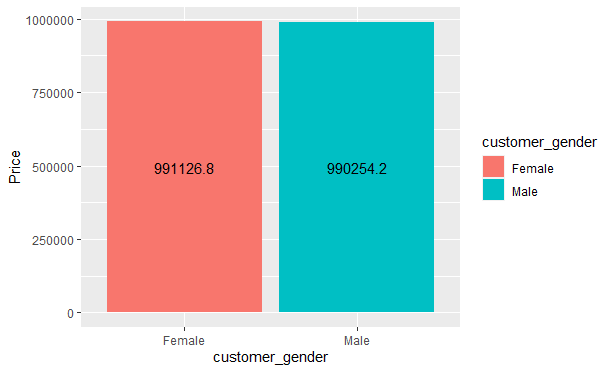

#### Customer_Type and Price:

In [ ]:
"""
pct = aggregate(Price~Customer_Type,df,sum)
x = ggplot(pct, aes(x = Customer_Type,y = Price, fill = Customer_Type))+ 
    geom_col() + 
    geom_text(label = pct$Price, position = position_stack(vjust=0.5))

plot(x)

# Comments on Plot:
# The plot shows a difference between the amount spent depending on the Customer_type. It is more likely
   members have spent more money since they have more chances of discounts and promotions

"""

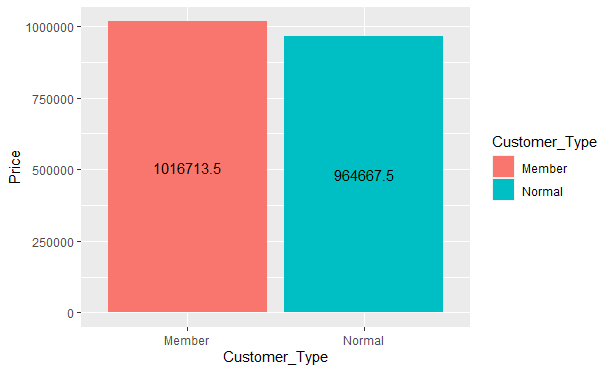

#### Customer_Type and customer_City

In [ ]:
"""
x = ggplot(df, aes(x=Customer_Type, fill=Customer_Type)) + geom_bar() + facet_wrap(~customer_City) +
   labs(title = 'Proportion of Members and Non Members in each Customer City', x= 'Customer Type' , y = 'Count')  +
   theme_bw() + 
   theme (axis.title.x = element_blank())

plot(x)

"""

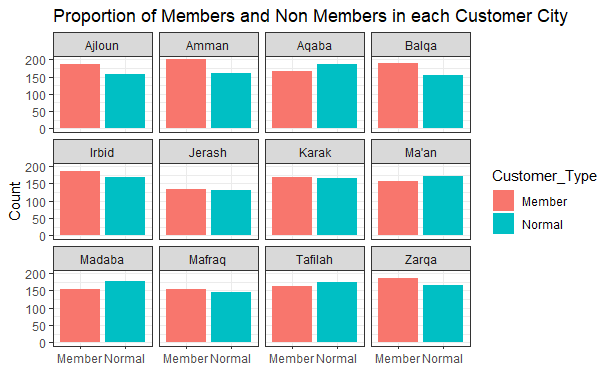

#### Customer_Type and Branch_Location

In [ ]:
"""
x = ggplot(df, aes(x=Customer_Type, fill=Customer_Type)) + geom_bar() + facet_wrap(~Branch_Location) + 
   labs(title = 'Proportion of Members and Non Members in each Branch', x= 'Customer Type' , y = 'Count')  +
   theme_bw() + theme (axis.title.x = element_blank())

plot(x)

"""

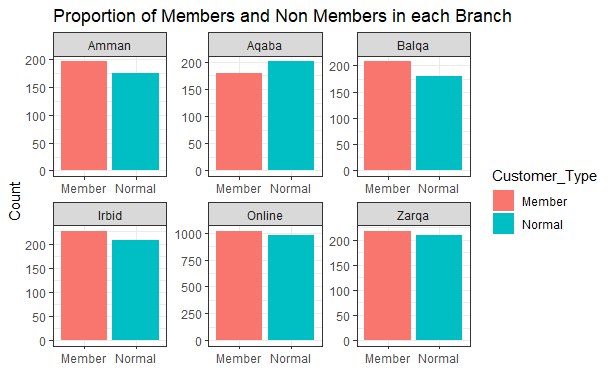

#### DEPARTMENT and Holiday

In [ ]:
"""
x = ggplot(df,aes(x=DEPARTMENT,y=Price,fill=DEPARTMENT )) +
   geom_bar(stat='identity') +
   facet_wrap(~Holiday , ncol=1)+labs(title = 'Sales of the Departments depending on Holidays')

plot(x)

"""

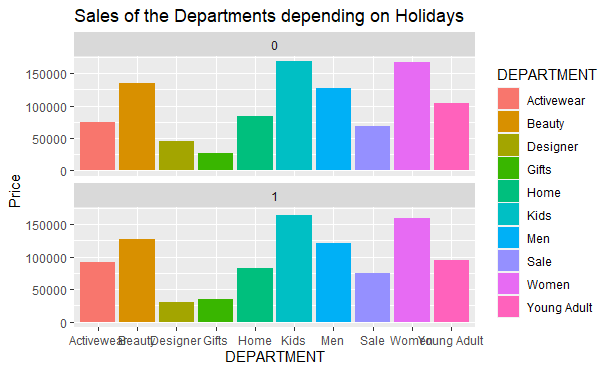

#### customer_age_bins and customer_gender

In [ ]:
"""
x = ggplot(df,aes(x=customer_age_bins,y=Price , fill = customer_gender)) +
   geom_bar(stat='summary',fun = sum ,position = 'dodge') +
   labs(title = 'Sales for different age-groups',subtitle = 'with respect of Gender ', x = 'Customer age' , y = 'total sales')

plot(x)
"""

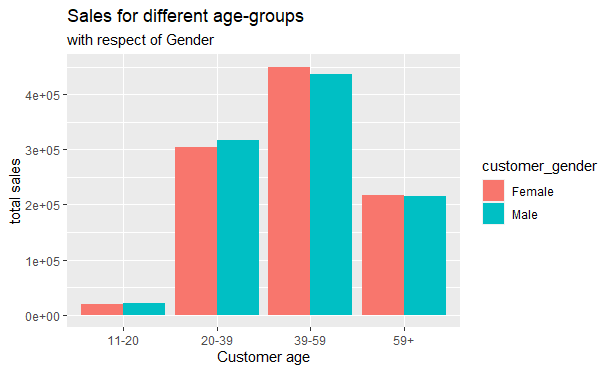

## Rosner's Test

Since the boxplots displayed some potential outliers, we used Rosner’s test on some columns due to its suitability to the problem at hand, since the data is larger than 25 data points.

In [ ]:
"""
#Library for Rosner's Test:

install.packages("EnvStats")
library(EnvStats)

"""

### For Quantity

In [ ]:
"""
boxplot(df$Quantity, outcol= "red", cex=1.5)

test <- rosnerTest(df$Quantity,k = 1, warn=TRUE) # Number of suspected outliers is 1
test                                             # Default alpha = 0.05

test$all.stats
"""


Result :
```
$distribution
[1] "Normal"

$statistic
     R.1 

2.646091 

$sample.size
[1] 4000

$parameters
k 
1 

$alpha
[1] 0.05

$crit.value
lambda.1 
4.363743 

$n.outliers
[1] 0

$alternative
[1] "Up to 1 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data.name
"df$Quantity"

$bad.obs
[1] 0

$all.stats
  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 63.53875 44.01256   180     312 2.646091   4.363743   FALSE

attr(,"class")
[1] "gofOutlier"
```
 **i**|**Mean.i**|**SD.i**|**Value**|**Obs.Num**|**R.i+1**|**lambda.i+1**|**Outlier**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
0|	63.53875|	44.01256|	180|	312|	2.646091|	4.363743|	FALSE


### For Price

In [ ]:
"""

boxplot(df$Price, outcol= "red", cex=1.5)

test2 <- rosnerTest(df$Price,k = 3) # Number of suspected outliers is 3
test2                                

test2$all.stats

"""


Result :

```
$distribution
[1] "Normal"

$statistic
     R.1      R.2      R.3 
1.752629 1.749005 1.749546 

$sample.size
[1] 4000

$parameters
k 
3 

$alpha
[1] 0.05

$crit.value
lambda.1 lambda.2 lambda.3 
4.363743 4.363688 4.363632 

$n.outliers
[1] 0

$alternative
[1] "Up to 3 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data.name
[1] "df$Price"

$bad.obs
[1] 0

$all.stats
  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 495.3453 287.8846 999.9     578 1.752629   4.363743   FALSE
2 1 495.2191 287.8099 998.6    2961 1.749005   4.363688   FALSE
3 2 495.0932 287.7358 998.5    3203 1.749546   4.363632   FALSE

attr(,"class")
[1] "gofOutlier"

```
 **i**|**Mean.i**|**SD.i**|**Value**|**Obs.Num**|**R.i+1**|**lambda.i+1**|**Outlier**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
0|		495.3453|	287.8846|	999.9|	578|	1.752629|	4.363743|	FALSE
1|	495.2191|	287.8099|	998.6	|2961|	1.749005|	4.363688|	FALSE|
2|	495.0932|	287.7358|	998.5|	3203	|1.749546	|4.363632|	FALSE

### For City_Population

In [ ]:
"""
boxplot(df$City_Population, outcol= "red", cex=1.5)
test3 <- rosnerTest(df$City_Population,k = 1)  # Number of suspected outliers is 1                               
test3

test3$all.stats
"""


Result :

```
$distribution
[1] "Normal"

$statistic
     R.1 
2.785632 

$sample.size
[1] 4000

$parameters
k 
1 

$alpha
[1] 0.05

$crit.value
lambda.1 
4.363743 

$n.outliers
[1] 0

$alternative
[1] "Up to 1 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data.name
[1] "df$City_Population"

$bad.obs
[1] 0

$all.stats
  i   Mean.i     SD.i   Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 555086.2 688645.9 2473400      30 2.785632   4.363743   FALSE

attr(,"class")
[1] "gofOutlier"

```


 **i**|**Mean.i**|**SD.i**|**Value**|**Obs.Num**|**R.i+1**|**lambda.i+1**|**Outlier**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
0|	555086.2|	688645.9|	2473400|	30|	2.785632|	4.363743 |FALSE

### For City_Area

In [ ]:
"""
boxplot(df$City_Area, outcol= "red", cex=1.5)

test4 <- rosnerTest(df$City_Area,k = 2) # Number of suspected outliers is 2
test4                                

test4$all.stats
"""

Result :

```
$distribution
[1] "Normal"

$statistic
     R.1      R.2 
2.526981 2.529317 

$sample.size
[1] 4000

$parameters
k 
2 

$alpha
[1] 0.05

$crit.value
lambda.1 lambda.2 
4.363743 4.363688 

$n.outliers
[1] 0

$alternative
[1] "Up to 2 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data.name
[1] "df$City_Area"

$bad.obs
[1] 0

$all.stats
  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 7259.676 10119.71 32832      17 2.526981   4.363743   FALSE
2 1 7253.281 10112.89 32832      22 2.529317   4.363688   FALSE

attr(,"class")
[1] "gofOutlier"
```

 **i**|**Mean.i**|**SD.i**|**Value**|**Obs.Num**|**R.i+1**|**lambda.i+1**|**Outlier**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
0|7259.676|	10119.71|	32832|	17|	2.526981|	4.363743|FALSE
1|	7253.281|	10112.89|	32832|	22|	2.529317|	4.363688|	FALSE

### For City_Density

In [ ]:
"""
boxplot(df$City_Density.people.km2., outcol= "red", cex=1.5)
test5 <- rosnerTest(df$City_Density.people.km2.,k = 5) # Number of suspected outliers is 5
test5                              

test5$all.stats
"""

Result :

```
$distribution
[1] "Normal"

$statistic
     R.1      R.2      R.3      R.4      R.5 
2.278169 2.279934 2.281704 2.283477 2.285254 

$sample.size
[1] 4000

$parameters
k 
5 

$alpha
[1] 0.05

$crit.value
lambda.1 lambda.2 lambda.3 lambda.4 lambda.5 
4.363743 4.363688 4.363632 4.363576 4.363521 

$n.outliers
[1] 0

$alternative
[1] "Up to 5 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data.name
[1] "df$City_Density.people.km2."

$bad.obs
[1] 0

$all.stats
  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 231.4920 215.9225 723.4       2 2.278169   4.363743   FALSE
2 1 231.3690 215.8093 723.4      10 2.279934   4.363688   FALSE
3 2 231.2459 215.6959 723.4      11 2.281704   4.363632   FALSE
4 3 231.1228 215.5823 723.4      50 2.283477   4.363576   FALSE
5 4 230.9996 215.4685 723.4      55 2.285254   4.363521   FALSE

attr(,"class")
[1] "gofOutlier"
```
 **i**|**Mean.i**|**SD.i**|**Value**|**Obs.Num**|**R.i+1**|**lambda.i+1**|**Outlier**|
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
0|	231.4920|	215.9225|	723.4|	2|	2.278169|	4.363743|	FALSE
1|	231.3690|	215.8093|	723.4|	10|	2.279934|	4.363688|	FALSE
2|	231.2459|	215.6959|	723.4|	11|	2.281704|	4.363632	|FALSE
3|	231.1228|	215.5823|	723.4|	50|	2.283477|	4.363576|	FALSE
4|	230.9996|	215.4685|	723.4|	55	|2.285254	|4.363521	|FALSE

# Saving Dataset

In [ ]:
df.to_csv('Final_Dataset_.csv')